# Student Final Grade Prediction

### Step 1: Importing required libraries 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plx
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import os
print(os.listdir('/kaggle/input/'))


['Student-final-grade-prediction-multi-lin-reg']

### Step 2: Reading the csv file 

In [7]:
student=pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (3)\student-mat.csv")

In [ ]:
student.info()
#To understand the data types of the given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   school                    395 non-null    object
 1   sex                       395 non-null    object
 2   age                       395 non-null    int64 
 3   address                   395 non-null    object
 4   famsize                   395 non-null    object
 5   Parrent_status            395 non-null    object
 6   Mother_edu                395 non-null    int64 
 7   Father_edu                395 non-null    int64 
 8   Mother_job                395 non-null    object
 9   Father_job                395 non-null    object
 10  reason_to_chose_school    395 non-null    object
 11  guardian                  395 non-null    object
 12  traveltime                395 non-null    int64 
 13  weekly_studytime          395 non-null    int64 
 14  failures                  

In [9]:
from sklearn.preprocessing import LabelEncoder
#Importing the library for categorical to numerical conversion

In [10]:
for column in student.columns:
    value_counts=student[column].value_counts()
    print(f"column:{column}\n{value_counts}\n")
    
#Here we are getting the see all the columns value counts in sngle cell.
#Also we understood that there was no null values using this code.

column:school
school
GP    349
MS     46
Name: count, dtype: int64

column:sex
sex
F    208
M    187
Name: count, dtype: int64

column:age
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

column:address
address
U    307
R     88
Name: count, dtype: int64

column:famsize
famsize
GT3    281
LE3    114
Name: count, dtype: int64

column:Parrent_status
Parrent_status
T    354
A     41
Name: count, dtype: int64

column:Mother_edu
Mother_edu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

column:Father_edu
Father_edu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64

column:Mother_job
Mother_job
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

column:Father_job
Father_job
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

column:reason_to_chose_school
reason_to_chose_school
c

### Step 3: Data preprocessing- Converting categorical variable into numerical variable

In [11]:
le=LabelEncoder()
student["school_encoding"]=le.fit_transform(student["school"])
student

#Here I have used One_Hot_Encoding as there geatures are nominal.
#Sugeesting to use the pd.get_dummies when features are ordinal.

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,1


In [12]:
student["sex_encoding"]=le.fit_transform(student["sex"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,1,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,1,1


In [13]:
student["address_encoding"]=le.fit_transform(student["address"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,0,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,0,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,5,4,11,9,9,9,1,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,3,14,16,16,1,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,10,8,7,1,1,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,3,4,5,0,11,12,10,1,1,0


In [14]:
student["famsize_encoding"]=le.fit_transform(student["famsize"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,0,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,0,0,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,11,9,9,9,1,1,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,3,14,16,16,1,1,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,10,8,7,1,1,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,0,11,12,10,1,1,0,1


In [15]:
student["Parrent_status_encoding"]=le.fit_transform(student["Parrent_status"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,0,0,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,0,0,1,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,10,7,8,10,0,0,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,0,0,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,11,9,9,9,1,1,1,1,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,3,14,16,16,1,1,1,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,10,8,7,1,1,0,0,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,5,0,11,12,10,1,1,0,1,1


In [16]:
student["Mother_job_encoding"]=le.fit_transform(student["Mother_job"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,5,6,6,0,0,1,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,5,5,6,0,0,1,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10,7,8,10,0,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,15,14,15,0,0,1,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6,10,10,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,11,9,9,9,1,1,1,1,0,3
391,MS,M,17,U,LE3,T,3,1,services,services,...,3,14,16,16,1,1,1,1,1,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,10,8,7,1,1,0,0,1,2
393,MS,M,18,R,LE3,T,3,2,services,other,...,0,11,12,10,1,1,0,1,1,3


In [17]:
student["Father_job_encoding"]=le.fit_transform(student["Father_job"])
student.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,5,6,6,0,0,1,0,0,0,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,5,6,0,0,1,0,1,0,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,7,8,10,0,0,1,1,1,0,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,15,14,15,0,0,1,0,1,1,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,6,10,10,0,0,1,0,1,2,2


In [18]:
pd.set_option('display.max_columns',None)

In [19]:
student.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2


In [20]:
student["reason_to_chose_school_encoding"]=le.fit_transform(student["reason_to_chose_school"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0


In [21]:
student["guardian_encoding"]=le.fit_transform(student["guardian"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0,2
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0,1
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0,2
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0,1


In [22]:
student["extra_edu_supp_encoding"]=le.fit_transform(student["extra_edu_supp"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0,2,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0,1,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0,2,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0,1,0


In [23]:
student["family_edu_supp_encoding"]=le.fit_transform(student["family_edu_supp"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0,2,0,1
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0,1,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0,2,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0,1,0,0


In [24]:
student["extra_paid_class_encoding"]=le.fit_transform(student["extra_curr_activities"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0,2,0,1,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0,1,0,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0,2,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0,1,0,0,0


In [25]:
student["extra_curr_activities_encoding"]=le.fit_transform(student["extra_curr_activities"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0,2,0,1,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0,1,0,0,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0,2,0,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0,1,0,0,0,0


In [26]:
student["nursery_encoding"]=le.fit_transform(student["nursery"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1,0,0,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0,1,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1,0,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0,2,0,1,0,0,1
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0,1,0,0,0,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0,2,0,0,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0,1,0,0,0,0,0


In [27]:
student["Interested_in_higher_edu_encoding"]=le.fit_transform(student["Interested_in_higher_edu"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding,Interested_in_higher_edu_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1,0,0,0,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0,2,0,1,0,0,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0,2,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0,1,0,0,0,0,0,1


In [28]:
student["interent_access_encoding"]=le.fit_transform(student["internet_access"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding,Interested_in_higher_edu_encoding,interent_access_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1,0,0,0,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0,2,0,1,0,0,1,1,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0,2,0,0,0,0,0,1,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0,1,0,0,0,0,0,1,1


In [29]:
student["romantic_relationship_encoding"]=le.fit_transform(student["romantic_relationship"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding,Interested_in_higher_edu_encoding,interent_access_encoding,romantic_relationship_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1,0,0,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,3,0,2,0,1,0,0,1,1,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,2,0,2,0,0,0,0,0,1,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,2,0,1,0,0,0,0,0,1,1,0


In [30]:
student.drop(['school','sex','address','famsize','Parrent_status','Mother_edu','Father_edu',
             'Mother_job','Father_job','reason_to_chose_school','guardian',
             'extra_edu_supp','family_edu_supp','extra_paid_class','extra_curr_activities',
             'nursery','Interested_in_higher_edu','internet_access','romantic_relationship'],axis=1,inplace=True)
#Dropping the old columns as we have converted all thses categorical columns into numerical columns.

In [31]:
student.head()

,age,traveltime,weekly_studytime,failures,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,Father_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding,Interested_in_higher_edu_encoding,interent_access_encoding,romantic_relationship_encoding
0,18,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,17,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,15,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1,0,0,0,1,1,1,0
3,15,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,16,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0,1,0,0,1,1,0,0


### Step 4: Defining the X and Y variable 

In [32]:
x=student.drop(columns=['G3'])
y=student['G3']
#Splitting the dataset into X and Y varaibles.

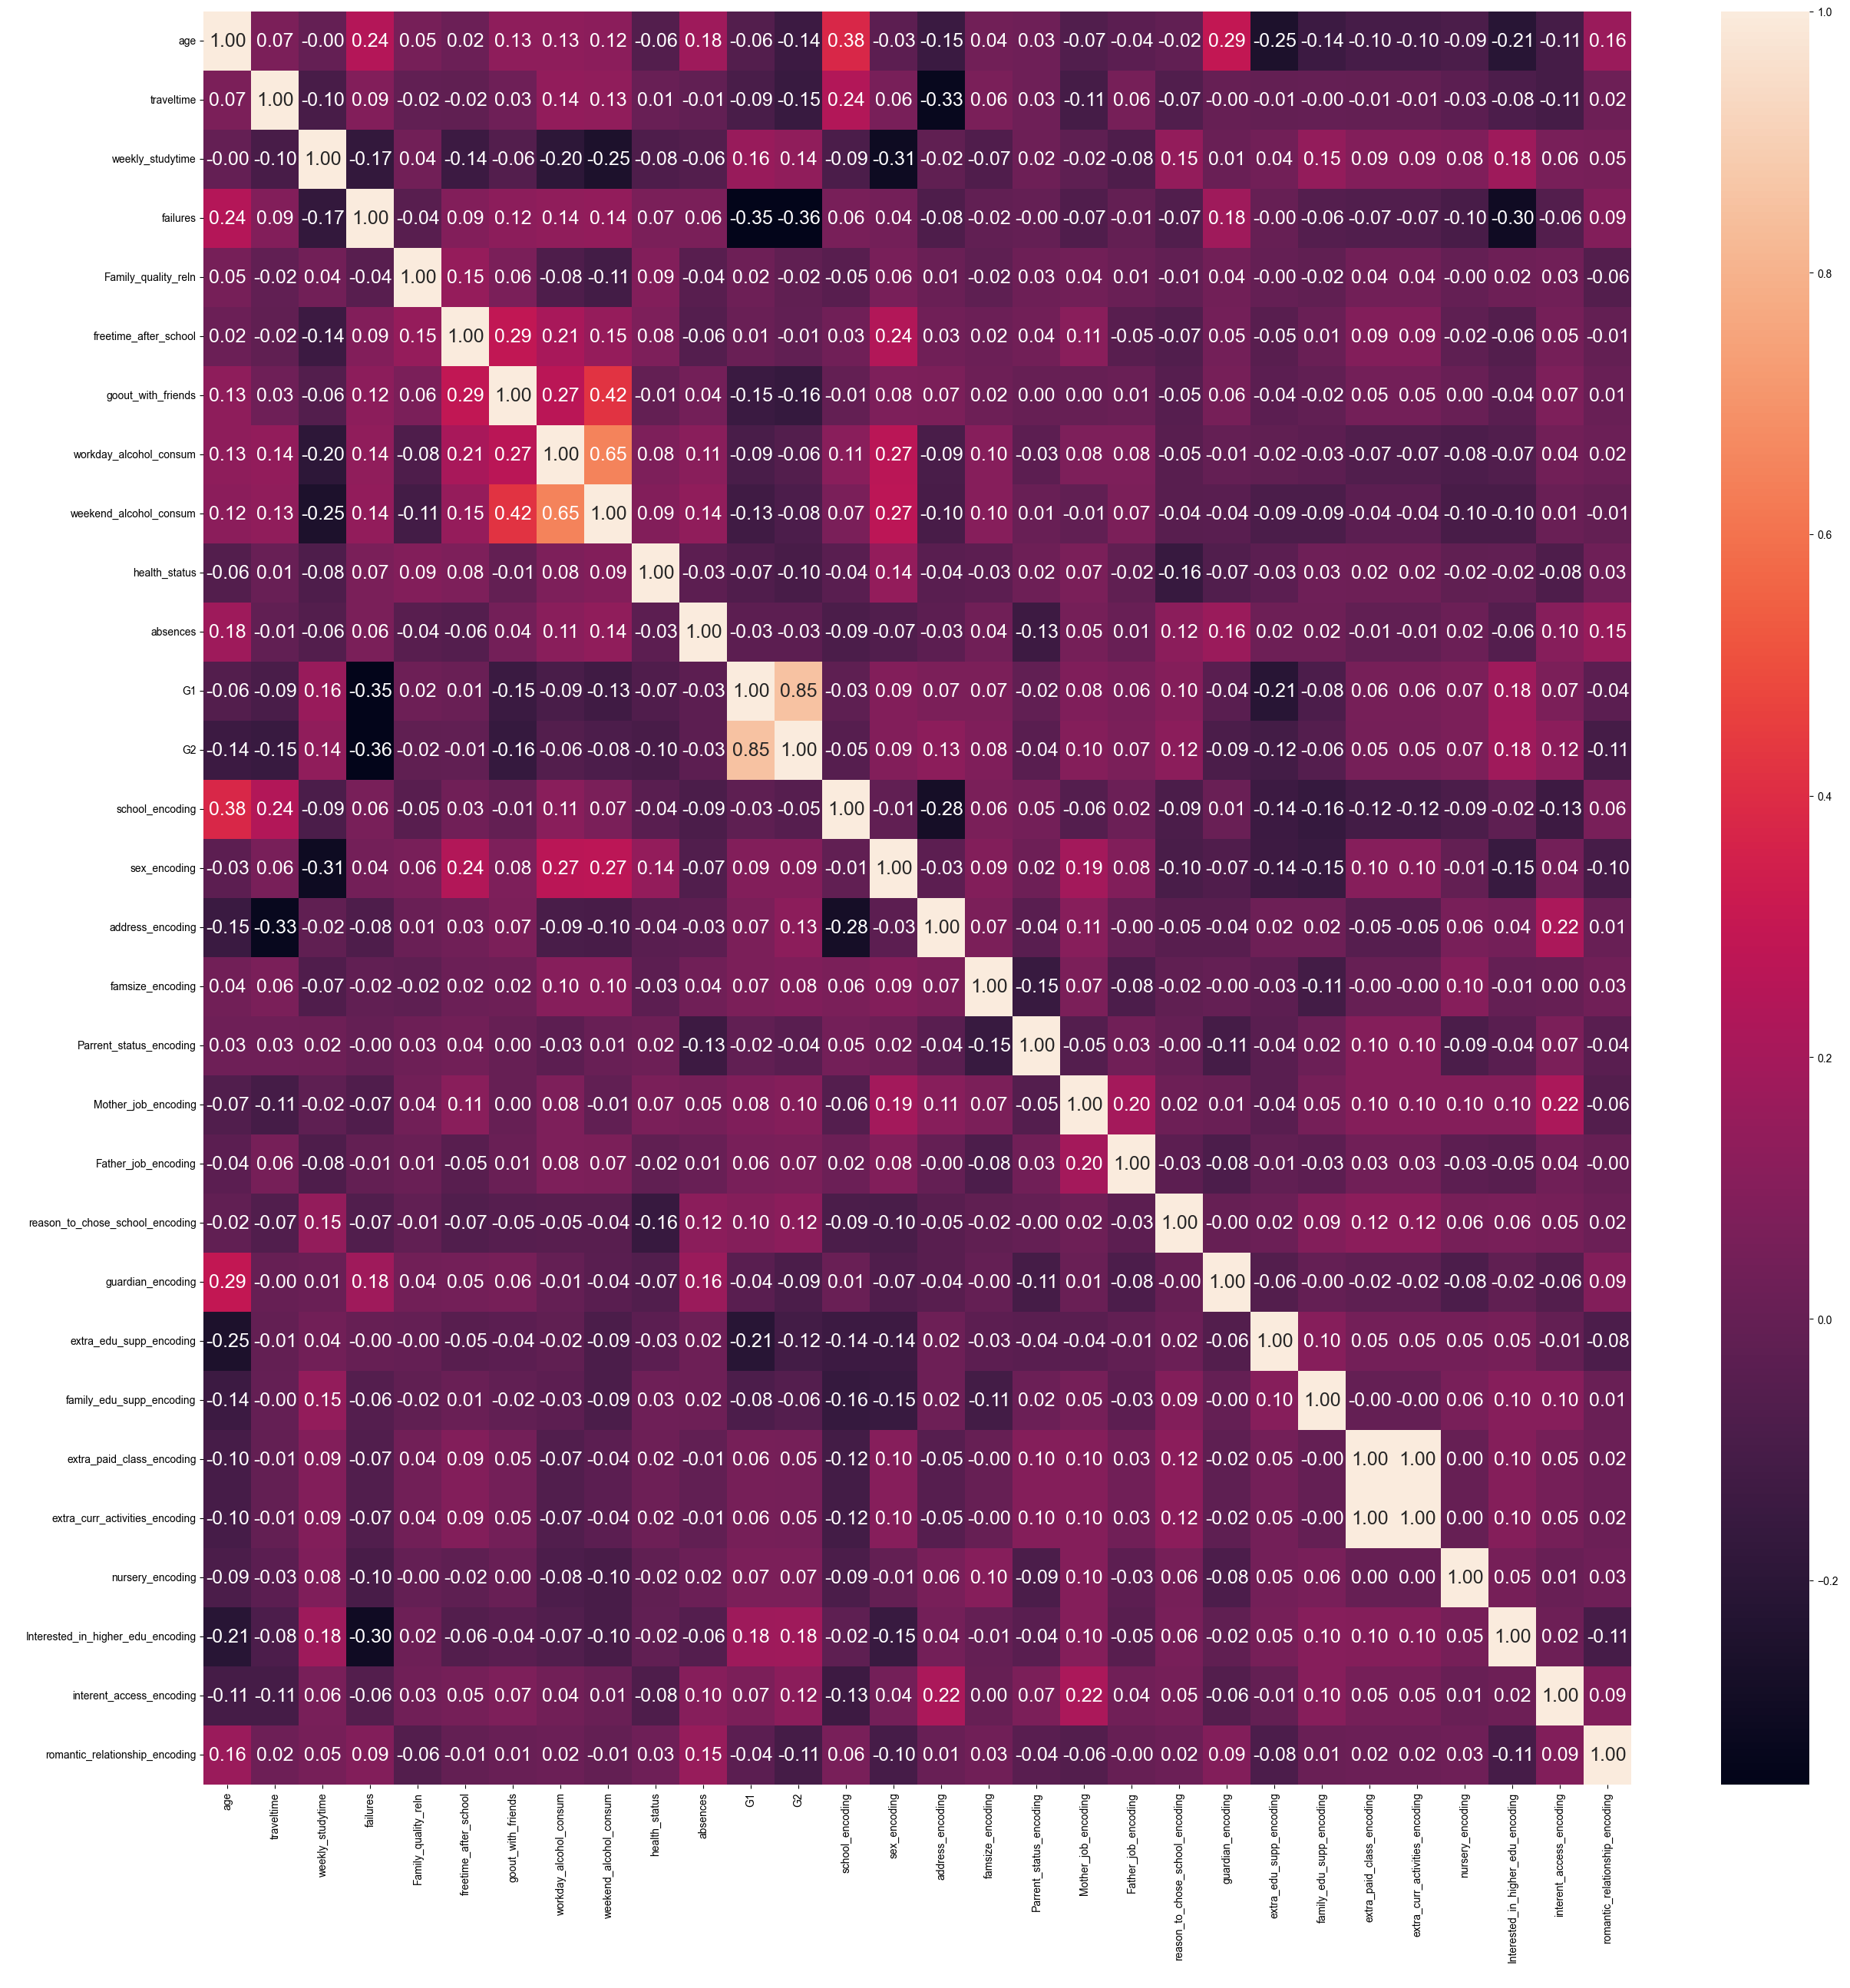

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(x.corr(),annot=True,fmt=".2f",annot_kws={"size": 18},xticklabels=x.columns, yticklabels=x.columns)
sns.set(font_scale=2)
plt.show()
#Plotting the heatmap to find the co-relation between different y varaibles.
#I have added different parameters in .heatmap to visulise the output in better manner.

1. There are only 2 varaibles having 0.65 are the co-relation value. Moderately co-related.
2. 2 variable having co-relation value as 0.42, 2 having 0.38
3. All other variables co-relation value is below this level.

### Step 5: Plotting the bell curve of all independent variables

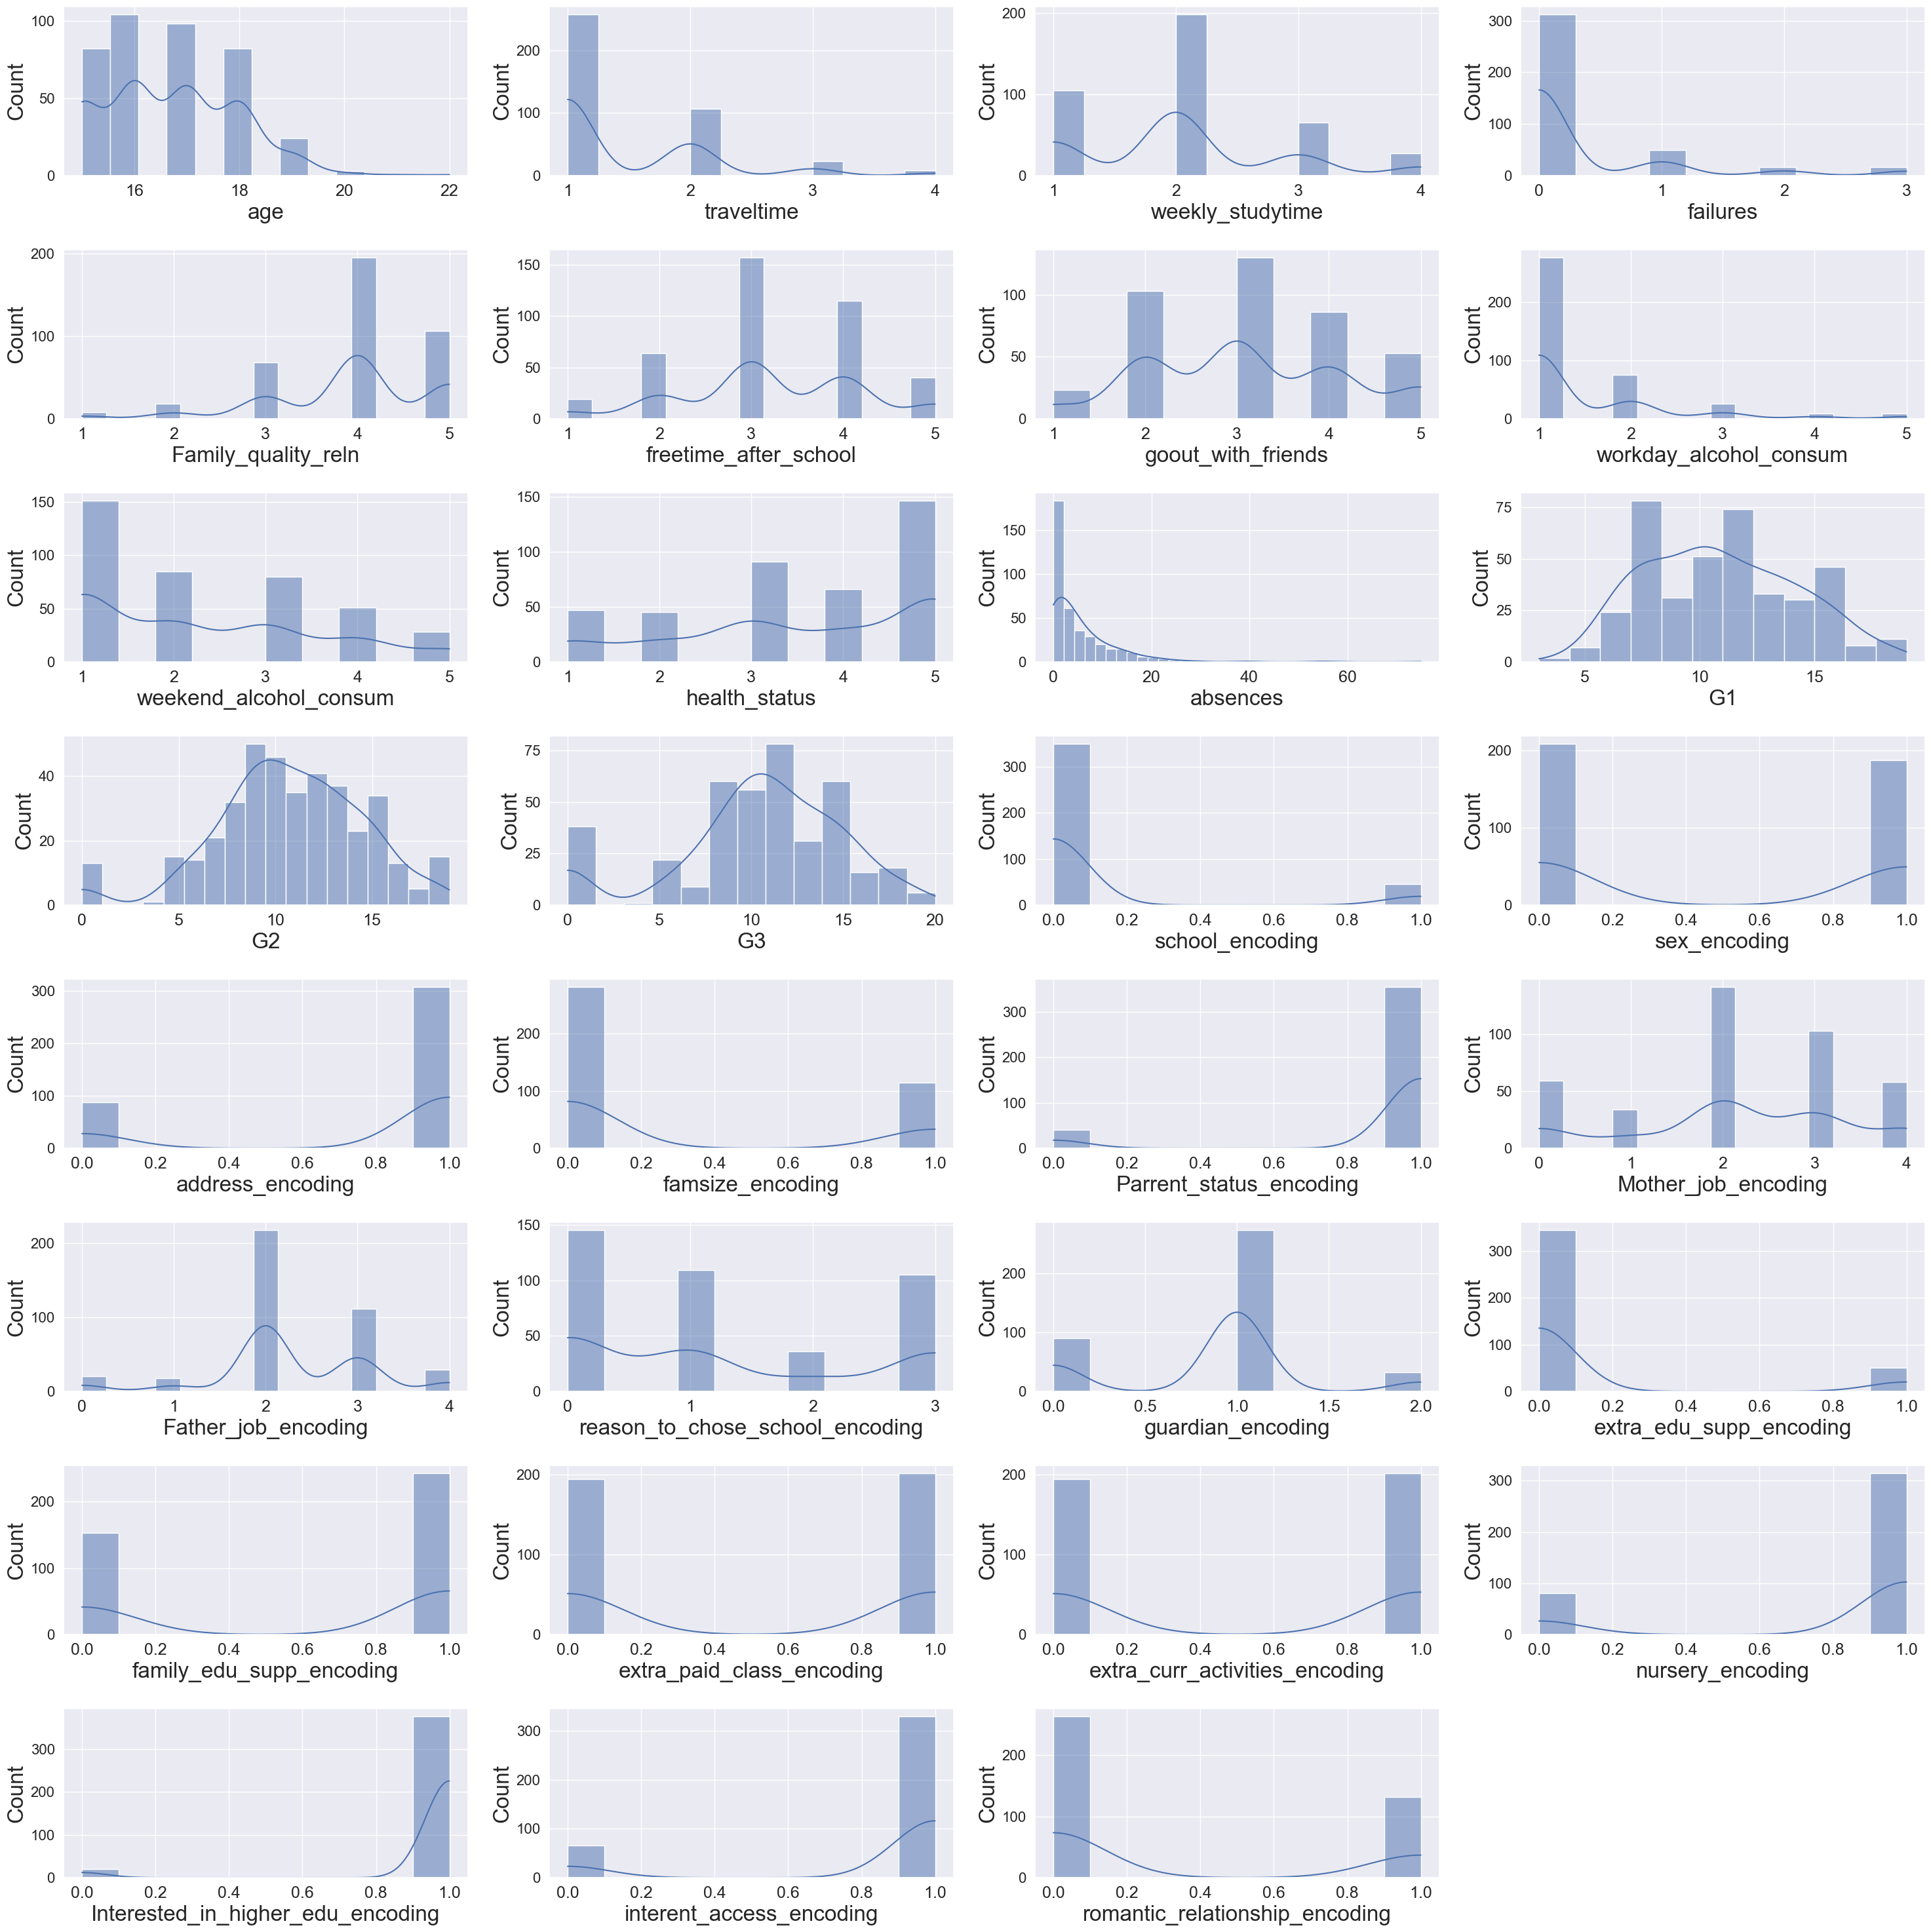

In [34]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in student.columns:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.histplot(student[column],kde=True)
        plt.xlabel(column,fontsize=24)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=16)
        plotnumber +=1
plt.tight_layout()
plt.show()

#Plotting the bell curve to check how independant varaibles are distributed.
#Also it helps to understand that all columns are converted into numerical varaibles.

### Step 6: Train test split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=323)
#Doing the train_test_split.

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 30)
(99, 30)
(296,)
(99,)


### Step 7: Feature Scaling

In [37]:
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.transform(x_test)

#Doing the feature scaling as we have different scales for different independant varaibles.

In [38]:
x_scaled_train

array([[ 0.24931807, -0.6227361 ,  1.10232197, ...,  0.23904572,
         0.43994135, -0.71428571],
       [-1.30432717, -0.6227361 , -0.09286962, ...,  0.23904572,
         0.43994135, -0.71428571],
       [ 0.24931807, -0.6227361 , -1.2880612 , ...,  0.23904572,
        -2.27303028,  1.4       ],
       ...,
       [-1.30432717, -0.6227361 , -0.09286962, ...,  0.23904572,
        -2.27303028, -0.71428571],
       [ 0.24931807, -0.6227361 , -0.09286962, ...,  0.23904572,
         0.43994135,  1.4       ],
       [-0.52750455, -0.6227361 , -0.09286962, ...,  0.23904572,
         0.43994135, -0.71428571]])

In [39]:
x_scaled_test

array([[-0.52750455, -0.6227361 , -1.2880612 , ...,  0.23904572,
        -2.27303028,  1.4       ],
       [ 1.02614069,  0.82868032, -1.2880612 , ...,  0.23904572,
         0.43994135, -0.71428571],
       [-0.52750455,  0.82868032, -0.09286962, ...,  0.23904572,
         0.43994135,  1.4       ],
       ...,
       [-0.52750455, -0.6227361 , -0.09286962, ...,  0.23904572,
         0.43994135,  1.4       ],
       [ 0.24931807,  0.82868032, -0.09286962, ...,  0.23904572,
         0.43994135, -0.71428571],
       [-1.30432717,  3.73151314,  2.29751355, ...,  0.23904572,
         0.43994135,  1.4       ]])

### Step 8: Fitting the linear regression model, fitting the training data and calculating the score of the test data

In [40]:
reg=LinearRegression()
reg.fit(x_scaled_train,y_train)

#Defining the LinearRegression() ans training the train data using .fit method.

LinearRegression()

In [41]:
reg.score(x_scaled_train,y_train)

#Calculating the score for training data.

0.8363957292406282

In [42]:
y_predy=reg.predict(x_scaled_test)
y_predy

#Predicting the y values for test dataset.

array([12.31291659, 12.70383323, 14.4226005 , 10.80096353,  8.44307881,
       12.10298446, 11.55588336,  6.02816319,  8.46866506, 13.4985351 ,
        8.17077606, 15.70488491, 16.37965673, 11.98264123, 11.87164725,
        8.54520197, -1.6446378 , 16.8136486 , 14.12682271,  7.79205377,
       13.30563283, 14.20444772,  9.15766152, 15.44180422,  7.10884079,
       14.10532203, 13.26274349, 12.0824478 , 15.68674082, 12.95120839,
       11.39124872, 18.59930114,  9.75558089, 11.39148006, 10.46679583,
        9.20273193,  7.75255048, 10.41128125, 11.7076739 , 17.71389458,
        7.40186051, 10.20170538,  5.06274814, 11.68939932, 10.95675233,
        5.8463975 ,  5.95311713,  7.35497884,  7.03413384, -1.34333627,
        8.07574664,  7.53653394, 12.540688  , 12.05701401, 12.96863354,
        2.16276126, 11.67294729,  7.50235261,  8.23157882,  3.14860137,
        9.79919176, 10.50442943,  7.29997394,  8.66726756,  6.57558538,
        4.05169798,  0.33012747, -1.21253054,  7.68729563, 19.81

### Step 9: Calculating the MSE and RMSE

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Importing the mean_squared_error and math libraries

In [45]:
rmse=sqrt(mean_squared_error(y_test,y_predy))
rmse

#Calculated the rmse value. We are able to undersdtand the difference between y_test and y_predicted values.

1.8685425949560672

In [46]:
from sklearn.metrics import r2_score

#Imported the r2score library.

In [47]:
Normal_r_squared_with_ypredy=r2_score(y_test,y_predy)
Normal_r_squared_with_ypredy

#R square values for the y_test and y_prediction datatset.

0.8451428414975035

In [48]:
adjusted_r_squared_with_nomal_method= 1 - (1-Normal_r_squared_with_ypredy)*(len(y)-1)/(len(y)-x.shape[1]-1)

In [49]:
reg.coef_

array([-2.93856654e-01,  9.21478142e-02, -1.46267415e-02, -1.70831097e-01,
        2.93225704e-01,  5.66696997e-02,  8.36089647e-02, -1.54564138e-01,
        1.20149938e-01,  8.40498233e-02,  4.17093430e-01,  7.22797812e-01,
        3.40925338e+00,  2.33652503e-01,  1.20073902e-02, -3.38583370e-02,
        8.89627019e-02, -5.05893057e-02,  1.10270902e-01, -1.08433959e-01,
        1.04286852e-01,  6.42624417e-02,  1.14843069e-01, -5.93639034e-03,
       -1.21113618e+13,  1.21113618e+13, -1.26711625e-01,  5.96298467e-02,
        7.66229509e-03, -6.98100160e-03])

In [50]:
reg.intercept_

np.float64(10.45945945945946)

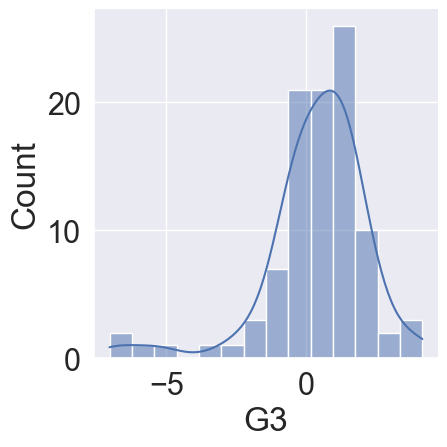

In [51]:
sns.displot(y_test-y_predy,kde=True)

### Step 10: Fitting the ridge regression model

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Importing the ridge regression and grid search CV to find the best alpha value.

In [ ]:
ridge=Ridge()
param_gride={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,101,220,219,215,210,207,208,206,205,300,0.5,
                     0.4,0.3,0.7,0.9]}
ridge_regressor=GridSearchCV(ridge,param_gride,scoring='r2',cv=5)
ridge_regressor.fit(x_scaled_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

#We have got the best alpha value and best fit score on the scaled training data.

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.39857e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.39936e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 10}
0.7819550854749427


In [55]:
ridge_regressor.cv_results_

{'mean_fit_time': array([0.00749354, 0.00180736, 0.0016109 , 0.00198913, 0.00160775,
        0.00181022, 0.00118599, 0.00152225, 0.00159745, 0.00140486,
        0.00178957, 0.00099702, 0.00179114, 0.00175762, 0.001089  ,
        0.00182824, 0.00218697, 0.00246429, 0.0022202 , 0.00218234,
        0.00185504, 0.00204773, 0.00190187, 0.00140352, 0.00189247,
        0.00181556, 0.00158587, 0.00178618, 0.00146046, 0.00238919,
        0.00144291]),
 'std_fit_time': array([8.61512910e-03, 7.67287509e-04, 5.01847280e-04, 8.87701152e-04,
        5.00647626e-04, 7.50461017e-04, 4.04887303e-04, 4.58867496e-04,
        4.90860960e-04, 5.02233671e-04, 3.96009399e-04, 5.51978917e-07,
        7.45308401e-04, 3.83600898e-04, 1.77800780e-04, 8.00161159e-04,
        7.48748488e-04, 7.62193225e-04, 9.71891765e-04, 7.52562398e-04,
        4.58387422e-04, 1.10198061e-03, 9.79741019e-04, 4.83885632e-04,
        9.68048330e-04, 7.70548266e-04, 4.81425280e-04, 3.94240023e-04,
        4.06404217e-04, 5.0751396

In [56]:
ridge_alpha=10

#Defining the ridge_alpha variable by providing ridge_alpha value.

In [57]:
ridge_reg=Ridge(ridge_alpha)
ridge_reg.fit(x_scaled_train,y_train)

#Training the ridge regression model using .fit method on the training dataset.

Ridge(alpha=10)

In [58]:
ridge_reg.coef_

array([-0.28988219,  0.07050529, -0.02046536, -0.18161052,  0.28290106,
        0.04607851,  0.06368805, -0.14654205,  0.12190418,  0.07341273,
        0.39505876,  0.94448886,  3.08736302,  0.22483603,  0.01875067,
       -0.02415214,  0.09189512, -0.06594435,  0.10309102, -0.09044874,
        0.11150852,  0.05182753,  0.11410298, -0.01615821, -0.1059386 ,
       -0.1059386 , -0.11540705,  0.07442236,  0.02893736, -0.03471198])

In [59]:
ridge_reg.intercept_

np.float64(10.45945945945946)

In [60]:
Ridge_r2=ridge_reg.score(x_scaled_test,y_test)
print(Ridge_r2)

#Using the .score method to find the regression score on the test dataset.

0.8414637609365383


In [61]:
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

#Initiated the adjusted r2 function to peenalise the model.

In [62]:
Ridge_adj_r2=adj_r2(x_scaled_test,y_test,ridge_reg)

#Calculating the adjusted r2 score for the ridge regression model.

In [63]:
prediction_ridge=ridge_regressor.predict(x_scaled_test)
prediction_ridge

#Predicting the y values using for the ridge regressor model.

array([12.13627517, 12.40847726, 14.20107248, 10.74948348,  8.46201555,
       12.06578199, 11.50573808,  6.13586333,  8.42112645, 13.71324733,
        8.12553948, 15.73938426, 16.41826857, 11.93860707, 11.88729876,
        8.6425508 , -1.22334254, 16.65789959, 14.07086077,  7.88070327,
       13.34380826, 13.97468803,  9.05673988, 15.44745969,  7.02752265,
       14.15090772, 13.20102282, 11.92738105, 15.62424832, 12.92063919,
       11.57216408, 18.48057771,  9.80514695, 11.46030487, 10.42243897,
        9.15474022,  7.97073937, 10.15428854, 11.66381399, 17.511634  ,
        7.56360896, 10.18533885,  4.87284099, 11.82620937, 10.9431114 ,
        5.84393362,  6.01529411,  7.2431601 ,  7.22422628, -0.85120269,
        8.12114142,  7.46440124, 12.39999332, 11.91603756, 12.83442907,
        2.36758899, 11.61721755,  7.5544273 ,  8.36548756,  3.06735682,
        9.64903815, 10.55752658,  7.40798468,  8.65173656,  6.61395424,
        4.29930318,  0.98050281, -0.4643549 ,  7.67945901, 19.69

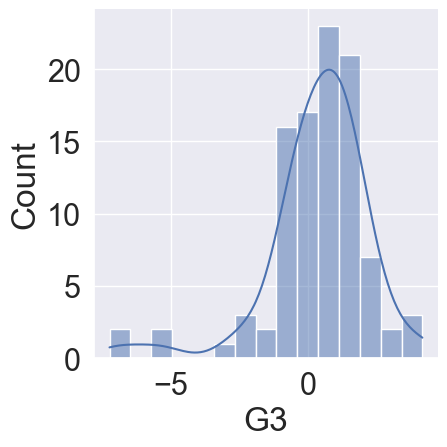

In [64]:
sns.displot(y_test-prediction_ridge,kde=True)

#Plotting the distribution plot to understand the spread of the difference of prediction and actual values.
#Observed that the output is skewed on left side. 
#Also pbserved that output is not perfect bell curve and there is slight variance in output on the skewed data.

In [65]:
rmse_ridge=sqrt(mean_squared_error(y_test,prediction_ridge))
rmse_ridge

#Calculating the rmse value for ridge regression.

1.8906086257462433

### Step 11: Fitting the Lasso regression model

In [66]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,101,220,219,215,210,207,208,206,205,300,0.5,
                     0.4,0.3,0.7,0.9]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)
lasso_regressor.fit(x_scaled_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

#Imported the LASSO regression library and found the best alpha parameter and best regression score.
#Also trained the training data using .fit method.

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.126e+01, tolerance: 4.623e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.205e+00, tolerance: 4.748e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

{'alpha': 0.3}
0.8062348495566857


In [67]:
lasso_alpha=0.3

In [68]:
lasso_reg=Lasso(lasso_alpha)
lasso_reg.fit(x_scaled_train,y_train)

#Training the training data using the best alpha value and using .fit method to training the training data.

Lasso(alpha=0.3)

In [69]:
lasso_reg.coef_

array([-0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.04058746,  0.49006461,  3.34206368,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ])

In [70]:
lasso_reg.intercept_

np.float64(10.45945945945946)

In [71]:
Lasso_r2=lasso_reg.score(x_scaled_test,y_test)
print(Lasso_r2)

#Calculated the Lasso r2 score on the test data.

0.8435024063011106


In [72]:
Lasso_adj_r2=adj_r2(x_scaled_test,y_test,lasso_reg)

#Calculated the adjusted r2 score for LASSO regression.

In [73]:
prediction_lasso=lasso_regressor.predict(x_scaled_test)
prediction_lasso

#Found the y values for LASSO regression using.predict method.

array([12.60527948, 12.47752654, 14.55784581, 11.52262354,  9.26143094,
       10.9188431 , 12.57340725,  6.36458568,  8.49802533, 13.06821887,
        8.34902424, 15.91725579, 16.0556328 , 11.67162463, 11.66100055,
        8.63640235, -0.47988857, 16.81903841, 13.80506429,  8.64702643,
       12.91390574, 14.54722174,  9.09118169, 15.03140929,  7.59624271,
       13.97531353, 12.73303242,  9.02418118, 15.04203336, 12.72240834,
       10.83358647, 18.0719436 ,  9.68718606, 10.62084091, 11.56511985,
        9.58068128,  7.71337157,  9.12305392, 11.72474502, 17.8804462 ,
        7.41536939, 10.61021684,  7.27699237, 11.81000164, 10.59959276,
        7.42599347,  5.46811509,  8.18939907,  8.62577827, -0.33088747,
        8.3702724 ,  7.43661754, 11.69287278, 12.43503023, 12.58403133,
        4.38014711, 11.56511985,  7.6493631 ,  8.64702643,  3.97564014,
       10.15258948, 10.61021684,  6.75820456,  8.50864941,  7.41536939,
        4.40139526,  0.2651169 , -0.03288529,  8.34902424, 18.17

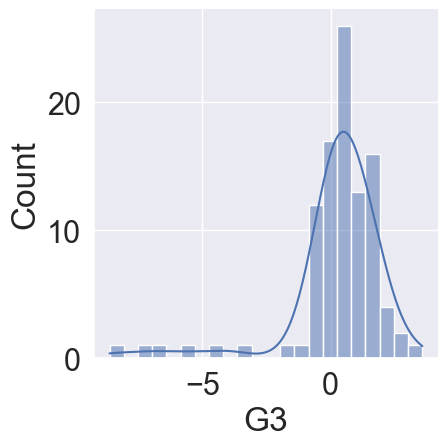

In [74]:
sns.displot(y_test-prediction_lasso,kde=True)

#Plotted the distribution plot of y_test and y_prediction difference for LASSO regression.
#Observed the bell curve skewed to left side similar to Ridge regression.
#But observed less variance and perfect shape of bell cruve.

In [75]:
rmse_lasso=sqrt(mean_squared_error(y_test,prediction_lasso))
rmse_lasso

#Calculating the rmse value for lasso regression.

1.8784134596287188

### Step 12: Elastic Net

In [76]:
from sklearn.linear_model import ElasticNetCV
elasticCV=ElasticNetCV(alphas=None,cv=5)
elasticCV.fit(x_scaled_train,y_train)

#Imported the ElasticNet library and fitted the training dataset.

ElasticNetCV(cv=5)

In [77]:
elastic_alpha=elasticCV.alpha_
elastic_alpha

#Obtained the best alpha value.

np.float64(0.12335484438849294)

In [78]:
from sklearn.linear_model import ElasticNet
elasticnet_reg=ElasticNet(alpha=elastic_alpha)
elasticnet_reg.fit(x_scaled_train,y_train)

#Retrained the training dataset with .fit method and with best alpha.

ElasticNet(alpha=np.float64(0.12335484438849294))

In [79]:
elasticnet_reg.coef_

array([-0.20877326,  0.        , -0.        , -0.13831648,  0.22075079,
        0.00417562,  0.        , -0.        ,  0.01577852,  0.        ,
        0.3102516 ,  0.99215394,  2.8961939 ,  0.11323476,  0.        ,
       -0.        ,  0.06512193, -0.02729178,  0.03717757, -0.0074395 ,
        0.04014934,  0.        ,  0.0175581 , -0.        , -0.0578486 ,
       -0.05367382, -0.02601461,  0.06449802,  0.        , -0.01721327])

In [80]:
elasticnet_reg.intercept_

np.float64(10.45945945945946)

In [81]:
Elastic_net_score=elasticnet_reg.score(x_scaled_test,y_test)
Elastic_net_score

#Obtained the elasticnet regression score for the test dataset.

0.839194976132238

In [82]:
Elastic_net_adj_r2=adj_r2(x_scaled_test,y_test,elasticnet_reg)
Elastic_net_adj_r2

#Calcaulted the adjusted r2 score for elastic net regression.

0.7682515832494019

In [83]:
prediction_elasticnet_reg=elasticnet_reg.predict(x_scaled_test)
prediction_elasticnet_reg

#Predicted the y values for elasticnet regression.

array([12.31857797, 11.96048224, 14.19804391, 10.97620633,  8.66590231,
       11.36859967, 11.90510381,  6.17207337,  8.42215507, 13.73742227,
        7.97815898, 15.69128411, 16.33468335, 11.71545171, 11.78047052,
        8.43482309, -0.79203117, 16.77646022, 13.97037141,  8.25225838,
       13.35325458, 13.95364033,  8.97578891, 15.58471877,  6.95192233,
       14.15658106, 12.54296908, 11.19575676, 15.49972686, 12.87194516,
       11.36388748, 18.11377554,  9.89829895, 11.03992925, 10.83111024,
        9.40189194,  7.93205348,  9.18832459, 11.78216088, 17.35633743,
        7.72379537, 10.35785103,  5.42459072, 11.96459459, 10.84272537,
        6.16001001,  5.48226632,  7.35208545,  8.12434429, -0.44003618,
        8.28511471,  7.13000083, 11.90079289, 12.19968652, 12.66210279,
        3.11678597, 11.73013771,  7.75553664,  8.64697459,  3.28125999,
        9.77710824, 10.58689531,  7.26013242,  8.58046359,  6.888901  ,
        4.23848384,  1.50751479,  0.36261658,  7.79155719, 18.97

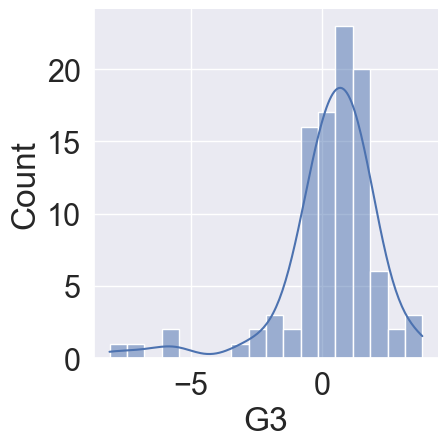

In [84]:
sns.displot(y_test-prediction_elasticnet_reg,kde=True)

#Plotted the distribution plot for the difference of y_test and y_predicted values for elastic net.
#Did not observed the smooth shape of bell curve as that of LASSO regression.

In [85]:
rmse_elasticnet=sqrt(mean_squared_error(y_test,prediction_elasticnet_reg))
rmse_elasticnet

1.9040886566294983

### Comparision of different regression model coefficients

In [86]:
reg.coef_

#Using simple regression model. Observed higher values of the coefficients.

array([-2.93856654e-01,  9.21478142e-02, -1.46267415e-02, -1.70831097e-01,
        2.93225704e-01,  5.66696997e-02,  8.36089647e-02, -1.54564138e-01,
        1.20149938e-01,  8.40498233e-02,  4.17093430e-01,  7.22797812e-01,
        3.40925338e+00,  2.33652503e-01,  1.20073902e-02, -3.38583370e-02,
        8.89627019e-02, -5.05893057e-02,  1.10270902e-01, -1.08433959e-01,
        1.04286852e-01,  6.42624417e-02,  1.14843069e-01, -5.93639034e-03,
       -1.21113618e+13,  1.21113618e+13, -1.26711625e-01,  5.96298467e-02,
        7.66229509e-03, -6.98100160e-03])

In [87]:
ridge_reg.coef_

#Observed coefficients less in Ridge regression. Some are negative ans some are positive

array([-0.28988219,  0.07050529, -0.02046536, -0.18161052,  0.28290106,
        0.04607851,  0.06368805, -0.14654205,  0.12190418,  0.07341273,
        0.39505876,  0.94448886,  3.08736302,  0.22483603,  0.01875067,
       -0.02415214,  0.09189512, -0.06594435,  0.10309102, -0.09044874,
        0.11150852,  0.05182753,  0.11410298, -0.01615821, -0.1059386 ,
       -0.1059386 , -0.11540705,  0.07442236,  0.02893736, -0.03471198])

In [88]:
elasticnet_reg.coef_

#As Elastic net is the combination of Ridge and LASSO.
#Here some coefficients are exactly zero where some are nearby zero.

array([-0.20877326,  0.        , -0.        , -0.13831648,  0.22075079,
        0.00417562,  0.        , -0.        ,  0.01577852,  0.        ,
        0.3102516 ,  0.99215394,  2.8961939 ,  0.11323476,  0.        ,
       -0.        ,  0.06512193, -0.02729178,  0.03717757, -0.0074395 ,
        0.04014934,  0.        ,  0.0175581 , -0.        , -0.0578486 ,
       -0.05367382, -0.02601461,  0.06449802,  0.        , -0.01721327])

In [ ]:

print("Normal_r_squared_with_ypredy:",Normal_r_squared_with_ypredy)
print("adjusted_r_squared_with_nomal_method:",adjusted_r_squared_with_nomal_method)
print("Ridge_r2:",Ridge_r2)
print("Ridge_adj_r2:",Ridge_adj_r2)
print("Lasso_r2:",Lasso_r2)
print("Lasso_adj_r2:",Lasso_adj_r2)
print("Elastic_net_score:",Elastic_net_score)
print("Elastic_net_adj_r2:",Elastic_net_adj_r2)

#Running this code helps to see the all regression models r2 and adjusted r2 score in one cell.

Normal_r_squared_with_ypredy: 0.8451428414975035
adjusted_r_squared_with_nomal_method: 0.8323798888736714
Ridge_r2: 0.8414637609365383
Ridge_adj_r2: 0.7715213025261876
Lasso_r2: 0.8435024063011106
Lasso_adj_r2: 0.774459350257483
Elastic_net_score: 0.839194976132238
Elastic_net_adj_r2: 0.7682515832494019


1. We have 31 columns independant variables here and as per the dataset only 2 varaibles having high co-relation with co-relation value as 0.85. 
2. We have plotted the distribution plot and observed less variance and the smooth shape similar to that of the bell curve for LASSO regression and not for other 2 models. Similarly there is little variance on the left side skewed data in regular regression model
3. Here we have also calculated the score using ridge,lasso and elastic net method. We have obtained higher r2 score using LASSO method as 84.35% and adjusted r2 score as 77.44%.
4. Also LASSO gives best results when we have large no. of coefficients and only few varaibles having high co-relation value.
5. Also observed rmse as 1.87 in LASSO, 1.90 in Elastic_net, 1.89 in Ridge and 1.86 in regular model.
6. In Machine Learning model aim is to reduce the residual error to minimum and increase the r2 score.


#### So based on above 6 points concluding that LASSO regression is the best fit regression model for this dataset. Regular regression model can also give the best result for the datatset